<a href="https://colab.research.google.com/github/muratkakun/Machine-Learning/blob/master/MLQ1(the_most_specific_hypothesis_and_the_most_general_hypothesis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame([
    [0.9, 0.8, 0],
    [0.85, 2.1, 0],
    [1.2, 1.0, 0],
    [2.1, 0.95, 0],
    [3.0, 1.1, 0],
    [3.9, 0.7, 0],
    [4.0, 1.4, 0],
    [4.2, 1.8, 0],
    [2.0, 2.3, 0],
    [3.0, 2.3, 0],
    [1.5, 1.8, 1],
    [2.0, 1.5, 1],
    [2.2, 2.0, 1],
    [2.4, 1.4, 1],
    [2.7, 1.85, 1],
    [2.0, 1.75, 1],
    [2.7, 1.85, 1]
    ],columns=['Feature1', 'Feature2', 'Result'])

In [0]:
def Method1():
   

    #df['F1RoundDown'] = df['Feature1'].apply(np.floor)
    #df['F2RoundDown'] = df['Feature2'].apply(np.floor)

    df['F1RoundUp'] = df['Feature1'].round(decimals=0)
    df['F2RoundUp'] = df['Feature2'].round(decimals=0)

    cols = ['F1RoundUp', 'F2RoundUp']
    df[cols] = df[cols].applymap(np.int64)


    f1_unique_count = df.F1RoundUp.unique().size
    f2_unique_count = df.F2RoundUp.unique().size
    #print(df.F1RoundUp.unique())
    #print(df.F2RoundUp.unique())

    f1_new = df[df['Result'] == 1]['F1RoundUp'].values[0]
    f2_new = df[df['Result'] == 1]['F2RoundUp'].values[0]

    dfh = pd.DataFrame([[f1_new, f2_new]], columns=['F1', 'F2'])
    dfh['F1'] = dfh['F1'].round(decimals=1)
    dfh['F2'] = dfh['F2'].round(decimals=1)


    print("-------------------------------")

    i = 0
    for index, row in df[df['Result'] == 1].iterrows():

        if i == 0:
          i=1;
          continue

        f1_new = '?'
        f2_new = '?'

        if row['F1RoundUp'] ==  dfh['F1'].values[i - 1] :
          f1_new = pd.to_numeric(row['F1RoundUp'])


        if row['F2RoundUp'] == dfh['F2'].values[i - 1]:
          f2_new = pd.to_numeric(row['F2RoundUp'])

        dfh = dfh.append({'F1' : f1_new , 'F2' : f2_new} , ignore_index=True)

        i = i + 1

    print(df[df['Result'] == 1])
    print(dfh)

    print(dfh.tail(1))

    hypotes_space = f1_unique_count*f2_unique_count
    print("Hypotes Space = ", hypotes_space)

    #print("S = ", dfh.columns[~dfh.isin(['?']).any()]) 

    new_dfh = dfh[dfh.eq('?').any(1)]


    def count_values_in_range(series):
        return  (series == '?').sum()

    new_dfh['Count'] = new_dfh.apply(
        func=lambda row: count_values_in_range(row), axis=1)

    indx_max = new_dfh['Count'].idxmax()

    indx_min = new_dfh['Count'].idxmin()


    print("max = ", indx_max)
    print("min = ", indx_min)
    print(new_dfh)



    #print(dfh)
    print("---------------G----------------")
    print(dfh.loc[[indx_max]])
    print("---------------G----------------")
    print("********************************")
    print("---------------S----------------")
    print(dfh.loc[[indx_min]])
    print("---------------S----------------")

In [0]:

def Method2():
   
  plt.scatter('Feature1', 'Feature2', data=df)
  plt.xlabel('Feature1')
  plt.ylabel('Feature2')
  plt.show()
   # 'Result'

In [0]:
from matplotlib.patches import Rectangle
colors = {0:'r', 1:'g'}
def DrawAllPoints():
  fig, ax = plt.subplots()

  for i in range(len(df['Feature1'])):
      ax.scatter(df['Feature1'][i], df['Feature2'][i],color=colors[df['Result'][i]])

  #ax.set_title('Data')
  ax.set_xlabel('Feature1')
  ax.set_ylabel('Feature2')
 

In [0]:

def DrawRec():
  
  DrawSRec()
  DrawGRec()

In [0]:
def DrawSRec():
  
  f1 = np.linspace(positive_val.Feature1.min()-shift,       
                     positive_val.Feature1.max() + shift)
   
  plt.gca().fill_between(f1, 
                       positive_val.Feature2.min() - shift, 
                       positive_val.Feature2.max() + shift, 
                       where=None,facecolor='g', alpha=0.3)
  

In [0]:
import random
def DrawGRec():
  All_G = []
  
  all_x1 = negative_val[negative_val.Feature1<=positive_val.Feature1.min()].Feature1.sort_values(ascending=True) 
  all_y1 = negative_val[negative_val.Feature2>=positive_val.Feature2.max()].Feature2.sort_values() 
  
  all_x2 = negative_val[negative_val.Feature1>=positive_val.Feature1.max()].Feature1.sort_values() 
  all_y2 = negative_val[negative_val.Feature2<=positive_val.Feature2.min()].Feature2.sort_values(ascending=True)   
  contains_N = False
  colors = ['b','g','r','c','m','y','k','w']
  color_index = 0
  temp_area = 0
  max_area = 0
  A1 = Point(0, 0)
  B1 = Point(0, 0)
  C1 = Point(0, 0)
  D1 = Point(0, 0)
  #A
  for y1 in all_y1:  
    for x1 in all_x1:  
      for x2 in all_x2:
        for y2 in all_y2:
          
          A = Point(x1 + shift, y1 - shift)
          B = Point(x2 - shift, y1 - shift)
          C = Point(x1 + shift, y2 + shift)
          D = Point(x2 - shift, y2 + shift)
         
          polygon = Polygon([(C.x, C.y), (A.x, A.y), (B.x, B.y), (D.x, D.y)])
         
          valid_G = CheckGValidity(polygon)
         
          if(valid_G == True):
            All_G.append(polygon)
            temp_area = abs((A.y - C.y)*(D.x - C.x))
            if  temp_area > max_area:
              max_area = temp_area
              A1 = A 
              B1 = B 
              C1 = C 
              D1 = D
            
  #color = "{}".format(random.randint(0, 0xFFFFFF))
  f2 = np.linspace(A1.x, B1.x)
  plt.gca().fill_between(f2, C1.y, A1.y, where=None,facecolor='r', alpha=0.2)
 

In [0]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

def CheckPoint( point):
 
  polygon = Polygon([(positive_val.Feature1.min() - shift, positive_val.Feature2.min() - shift),
                     (positive_val.Feature1.min() - shift, positive_val.Feature2.max() + shift), 
                     (positive_val.Feature1.max() + shift, positive_val.Feature2.max() + shift), 
                     (positive_val.Feature1.max() + shift, positive_val.Feature2.min() - shift)])
  
  return polygon.contains(point)

In [0]:
def CheckSValidity():
  retun_val = True
  for index, row in negative_val.iterrows():
    x_n = row['Feature1']
    y_n = row['Feature2']
    point = Point(x_n, y_n)
    
    if CheckPoint(point) == True:
      retun_val =  False
      plt.scatter(x_n, y_n, s=100, c=colors[row['Result']])
     
  return retun_val

In [0]:
def CheckGValidity(polygon_G):
  retun_val = True
  for index, row in negative_val.iterrows():
    x_n = row['Feature1']
    y_n = row['Feature2']
    point = Point(x_n, y_n)
    
    if polygon_G.contains(point) == True:
      return False
          
  return True

Has S Hipotesis =  True


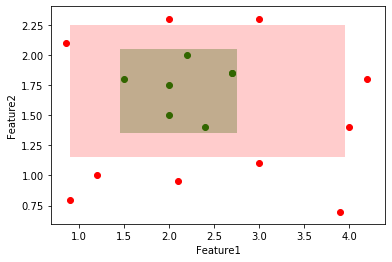

In [138]:
index = 0 #index of value index
result = 1 #0 or 1
shift = 0.05
positive_val = df[df['Result'] == 1] 
negative_val = df[df['Result'] == 0] 

DrawAllPoints()
check = CheckSValidity()
if check == True:
  DrawRec()
  
#x_p = df[df['Result'] == result]['Feature1'].values[index] 
#y_p = df[df['Result'] == result]['Feature2'].values[index]
#plt.scatter(x_p, y_p, s=55)
#point = Point(x_p, y_p)
#contains = CheckPoint(point)

#print("(", x_p,",",y_p,")", "Contains Point = ", contains)
print("Has S Hipotesis = ", check)


# New Section